# Linear Regression is a method used to define a relationship between a dependent variable (Y) and independent variable (X). 
## Which is simply written as :

![alt text](1_nejpuvlh1MbMGQtve_1ztQ.png "Title")

### Where y is the dependent variable, m is the scale factor or coefficient, b being the bias coefficient and X being the independent variable. The bias coefficient gives an extra degree of freedom to this model. The goal is to draw the line of best fit between X and Y which estimates the relationship between X and Y.


#### And the total error of the linear model is the sum of the error of each point. I.e. ,
![alt text](1a.jpeg "Title")

ri = Distance between the line and ith point.

n =Total number of points.

#### We are squaring each of the distance’s because some points would be above the line and some below. We can minimize the error of our linear model by minimizing r thus we have

![alt text](1b.png "Title")

where x¯ is the mean of the input variable X and y¯ being the mean of the output variable Y.

In [3]:
import numpy as np
import pandas as pd
  
# initialize list of lists 
data = [[0,96], [1,85], [2,82],[3,74],[3,95],[5,68],[5,76],[5,84],[6,58],[7,65],[7,75],[10,50]] 
  
# Create the pandas DataFrame 
dataset = pd.DataFrame(data, columns = ['X', 'Y']) 
  
# print dataframe. 
dataset

,X,Y
0,0,96
1,1,85
2,2,82
3,3,74
4,3,95
5,5,68
6,5,76
7,5,84
8,6,58
9,7,65


In [4]:
# initializing our inputs and outputs
X = dataset['X'].values
Y = dataset['Y'].values
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)
#total number of values
n = len(X)

In [5]:
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
#printing the coefficient
print(b1, b0)

-4.067415730337078 93.97003745318352


### Now we have our bias coefficient(b) and scale factor(m). In mathematical terms :

## Brain weights =  93.97003745318352 + (-4.067415730337078)* Head size

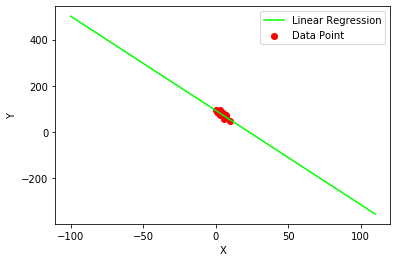

In [7]:
import matplotlib.pyplot as plt

#plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100
#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x
#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('X')
#y-axis label
plt.ylabel('Y')
plt.legend()
plt.show()

## We need to able to measure how good our model is (accuracy). There are many methods to achieve this but we would implement Root mean squared error and coefficient of Determination (R² Score).

### Root Mean Squared Error is the square root of the sum of all errors divided by the number of values, or Mathematically,
![alt text](1c.gif "Title")


### Here yj^ is the ith predicted output values. Now we will find RMSE.

In [8]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

7.406428358103544


## Let's find our R² score to be able to measure the accuracy of our linear model, mathematically :
![alt text](1d.gif "Title")

SST is the total sum of squares and SSR is the total sum of squares of residuals.
R² Score usually ranges from 0 to 1. It will also become negative if the model is completely wrong. Now we will find the R² Score.

In [9]:
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.6910534235209742


## 0.69 is certainly not bad, but we can improve the score by :

1) Getting more datasets
2) Improving the features
3) Fit many models etc